## Notebook to plot ensemble cospectras for each 3 hour bin on separarte subplots.
Daniel Metzen, 23/07/2019.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
def plot_ensemble_spectras(path_to_ensemble_file, cospectra, outfile=None):
    # load file, select cospectra and set time bins
    df = pd.read_csv(path_to_ensemble_file, skiprows=3, index_col=0)
    df_sel = df.loc[:, df.columns.str.contains(cospectra)]
    df_sel.columns = ['0:00 - 3:00', '3:00 - 6:00', '6:00 - 9:00',
                      '9:00 - 12:00', '12:00 - 15:00', '15:00 - 18:00',
                      '18:00 - 21:00', '21:00 - 0:00']
    # generate idea slope
    x = np.linspace(0.2, 5)
    y = .02*x**(-4/3)
    # create array with subplots
    fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(8, 8))
    ax = axs.ravel()
    # plot each time bin on separate suplot
    for i, col in enumerate(df_sel):
        ax[i].plot(x, y, 'k--', label='-4/3 slope')
        ax[i].loglog(df_sel[col], 'k.', label='')
        ax[i].legend(loc='lower left')
        ax[i].set_ylim(10**-5, 1)
        ax[i].set_xlabel('f (Hz)')
        ax[i].set_ylabel(f'cospectra ({cospectra})')
        ax[i].set_title(col)
    plt.tight_layout()
    plt.show()
    # save plot if desired
    if outfile:
        plt.savefig(outfile, dpi=300, bbox_inches='tight')

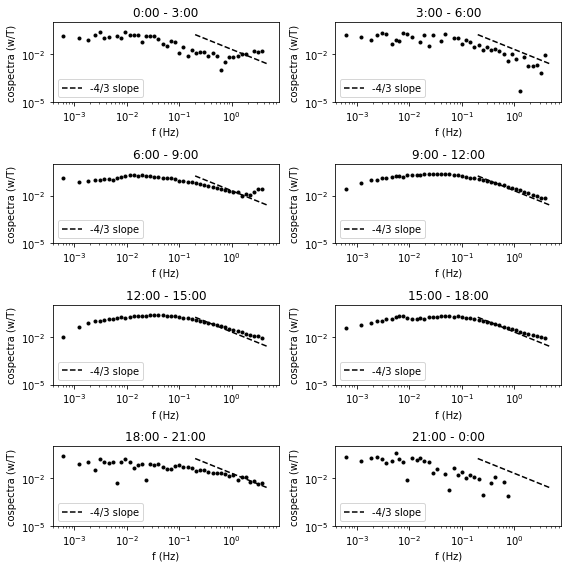

In [3]:
plot_ensemble_spectras(r'E:\flux_data_processing\10hz_data\MOFO_understory\ep_output\13m_canopy_height\eddypro_spectral_analysis\eddypro_mofou_ensemble_cospectra_by_time_2019-07-08T141441_adv.csv',
                       cospectra='w/T')